In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitueds as pairs by zipping them.
lat_lngs = zip(lats, lngs)

# Returns a zip object in memory.
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
# Import the citipy script from the citipy module.
from citipy import citipy

In [44]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination:

# Iterate through the coordinates' zipped tuple.
for coordinate in coordinates:
    # Get the name of the city nearest to the coordinates and save it in the "city" variable.
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

612

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [46]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [47]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list. Reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # Check if the remainder of the index divided by 50 is equal to 0 and if the index >= 50    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. 
    # Remove the blank spaces in the city name and concatenate it with '+'.
    # This will find the corresponding weather data for the city instead of finding 
    # the weather data for the first part of the city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record count, set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count before the next city is processed.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON file and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        # pass is a general purpose statement to handle all errors encountered
        # and to alloow the program to continue
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | valparaiso
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | marzuq
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | khonuu
City not found. Skipping...
Processing Record 8 of Set 1 | jilmah
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | sena madureira
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | jiddah
City not found. Skipping...
Processing Record 13 of Set 1 | parkes
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | salekhard
Processing Record 16 of Set 1 | antalaha
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | pingliang
Processing 

Processing Record 37 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 38 of Set 4 | gat
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | uvarovka
Processing Record 41 of Set 4 | chicama
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | haradok
Processing Record 44 of Set 4 | rudnogorsk
Processing Record 45 of Set 4 | sandwick
Processing Record 46 of Set 4 | steamboat springs
Processing Record 47 of Set 4 | kijang
Processing Record 48 of Set 4 | butaritari
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | methoni
Processing Record 1 of Set 5 | kolokani
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | guarapari
Processing Record 5 of Set 5 | porterville
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | meyungs
City not found. Skipping...
Processing Record 8 of Set 5 | saskylakh
Processing Recor

Processing Record 26 of Set 8 | spring
Processing Record 27 of Set 8 | yumen
Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | golyshmanovo
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | namtsy
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | college
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | nuuk
Processing Record 37 of Set 8 | pasichna
Processing Record 38 of Set 8 | najran
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | longyearbyen
Processing Record 41 of Set 8 | albemarle
Processing Record 42 of Set 8 | teshie
Processing Record 43 of Set 8 | domoni
Processing Record 44 of Set 8 | shasta lake
Processing Record 45 of Set 8 | anadyr
Processing Record 46 of Set 8 | palembang
Processing Record 47 of Set 8 | zhezkazgan
Processing Record 48 of Set 8 | goderich
Processing Record 49 of Set 

Processing Record 15 of Set 12 | mocambique
City not found. Skipping...
Processing Record 16 of Set 12 | at-bashi
Processing Record 17 of Set 12 | ust-tsilma
Processing Record 18 of Set 12 | nelson bay
Processing Record 19 of Set 12 | erbaa
Processing Record 20 of Set 12 | raga
Processing Record 21 of Set 12 | bokspits
City not found. Skipping...
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | saint-georges
Processing Record 24 of Set 12 | ziarat
Processing Record 25 of Set 12 | leshukonskoye
Processing Record 26 of Set 12 | fukue
Processing Record 27 of Set 12 | zhengjiatun
Processing Record 28 of Set 12 | concepcion
Processing Record 29 of Set 12 | goshen
Processing Record 30 of Set 12 | butterworth
Processing Record 31 of Set 12 | meulaboh
Processing Record 32 of Set 12 | cabedelo
Processing Record 33 of Set 12 | bay saint louis
Processing Record 34 of Set 12 | hojai
Processing Record 35 of Set 12 | ishurdi
Processing Record 36 of Set 12 | riyadh
Processing Re

In [49]:
len(city_data)

559

In [50]:
# Convert the array of dictionaries in city_data to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Valparaiso,-33.0393,-71.6273,62.83,77,20,4.61,CL,2021-11-26 23:20:58
1,Coquimbo,-29.9533,-71.3436,62.33,72,75,10.36,CL,2021-11-26 23:16:16
2,Puerto Ayora,-0.7393,-90.3518,70.03,80,69,11.90,EC,2021-11-26 23:19:51
3,Marzuq,14.4000,46.4667,67.37,46,5,2.21,YE,2021-11-26 23:20:59
4,Jamestown,42.0970,-79.2353,31.59,93,90,20.71,US,2021-11-26 23:21:00
5,New Norfolk,-42.7826,147.0587,56.70,49,72,2.42,AU,2021-11-26 23:21:01
6,Sena Madureira,-9.0656,-68.6569,83.37,63,85,2.75,BR,2021-11-26 23:21:02
7,Kaitangata,-46.2817,169.8464,50.29,67,100,3.67,NZ,2021-11-26 23:21:02
8,Parkes,-33.1333,148.1833,54.37,87,100,9.91,AU,2021-11-26 23:21:03
9,Ancud,-41.8697,-73.8203,53.13,71,100,6.51,CL,2021-11-26 23:16:10


In [51]:
# Reorder the columns in the city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Valparaiso,CL,2021-11-26 23:20:58,-33.0393,-71.6273,62.83,77,20,4.61
1,Coquimbo,CL,2021-11-26 23:16:16,-29.9533,-71.3436,62.33,72,75,10.36
2,Puerto Ayora,EC,2021-11-26 23:19:51,-0.7393,-90.3518,70.03,80,69,11.90
3,Marzuq,YE,2021-11-26 23:20:59,14.4000,46.4667,67.37,46,5,2.21
4,Jamestown,US,2021-11-26 23:21:00,42.0970,-79.2353,31.59,93,90,20.71
5,New Norfolk,AU,2021-11-26 23:21:01,-42.7826,147.0587,56.70,49,72,2.42
6,Sena Madureira,BR,2021-11-26 23:21:02,-9.0656,-68.6569,83.37,63,85,2.75
7,Kaitangata,NZ,2021-11-26 23:21:02,-46.2817,169.8464,50.29,67,100,3.67
8,Parkes,AU,2021-11-26 23:21:03,-33.1333,148.1833,54.37,87,100,9.91
9,Ancud,CL,2021-11-26 23:16:10,-41.8697,-73.8203,53.13,71,100,6.51


In [52]:
# Create the output file (CSV). Save the file to the weather_data folder with the file name cities.
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV with the index label (or column A) header as "City_ID".
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

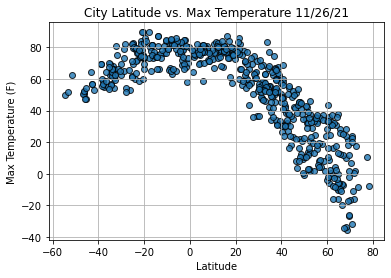

In [54]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

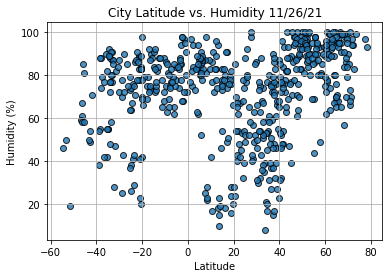

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

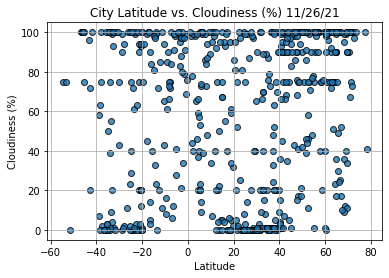

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

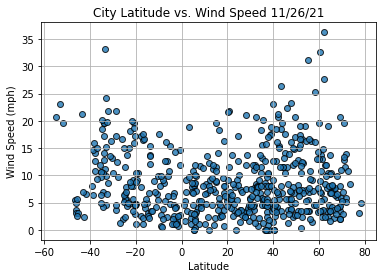

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set the title, including today's date in the format MM/DD/YY
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

# Set the x-axis and y-axis labels
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Show the grid
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [78]:
# Import linregress
from scipy.stats import linregress   

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
# Get a Series of the data from row 13 in city_data_df.
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-11-26 23:17:24
Lat                      -46.1927
Lng                      168.8643
Max Temp                    51.67
Humidity                       61
Cloudiness                    100
Wind Speed                   3.09
Name: 13, dtype: object

In [80]:
# Get a Series of city_data_df filtered on values greater than 0 in the "Lat" column.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
554     True
555     True
556    False
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [81]:
# Get a DataFrame of city_data_df filtered on values greater than 0 in the "Lat" column.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Marzuq,YE,2021-11-26 23:20:59,14.4000,46.4667,67.37,46,5,2.21
4,Jamestown,US,2021-11-26 23:21:00,42.0970,-79.2353,31.59,93,90,20.71
10,Salekhard,RU,2021-11-26 23:21:03,66.5300,66.6019,-19.61,100,25,2.24
15,Pingliang,CN,2021-11-26 23:21:06,35.5392,106.6861,34.00,80,79,5.32
16,Fortuna,US,2021-11-26 23:18:09,40.5982,-124.1573,59.92,47,1,0.00


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [83]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Marzuq,YE,2021-11-26 23:20:59,14.4000,46.4667,67.37,46,5,2.21
4,Jamestown,US,2021-11-26 23:21:00,42.0970,-79.2353,31.59,93,90,20.71
10,Salekhard,RU,2021-11-26 23:21:03,66.5300,66.6019,-19.61,100,25,2.24
15,Pingliang,CN,2021-11-26 23:21:06,35.5392,106.6861,34.00,80,79,5.32
16,Fortuna,US,2021-11-26 23:18:09,40.5982,-124.1573,59.92,47,1,0.00


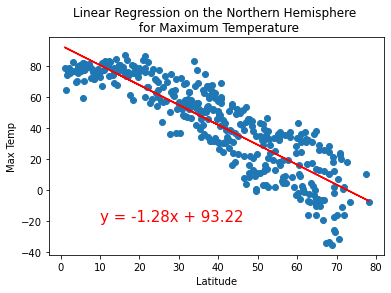

In [84]:
# Linear regression on the Maximumum Temperature for the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                      'Max Temp',
                      (10,-20))

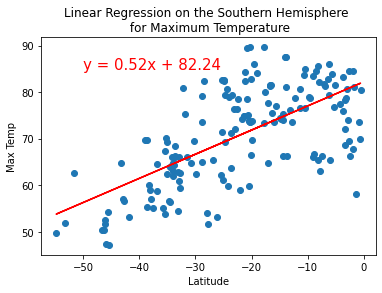

In [87]:
# Linear regression on the Maximumum Temperature for the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                      'Max Temp',
                      (-50,85))

Finding: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than -1 for the Northern Hemisphere and greater than 0.5 for the Southern Hemisphere, as show by the plots above. This means that as we approach the equator, 0 degree latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.

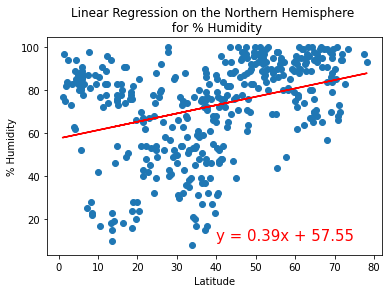

In [95]:
# Linear regression on the % Humidity for the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (40,10))

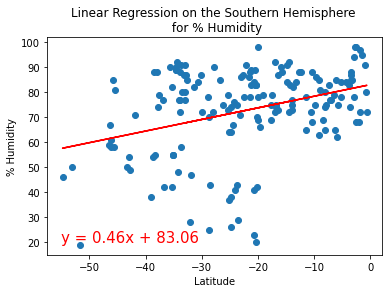

In [96]:
# Linear regression on the % Humidity for the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (-55,20))


Finding: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.5 for the Northern and Southern Hemispheres for the plots shown above. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

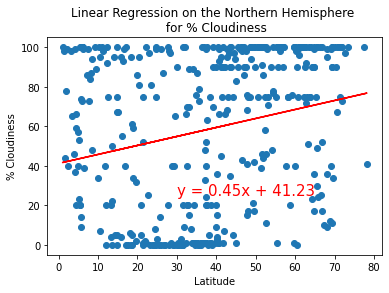

In [98]:
# Linear regression on the % Cloudiness for the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (30,25))

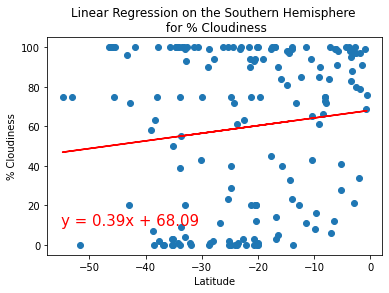

In [102]:
# Linear regression on the % Cloudiness for the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-55,10))

Finding: The correlation between the latitude and percent cloudiness is very low because the r-value is less than 0.5 for the Northern and Southern Hemispheres for the plots shown above. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

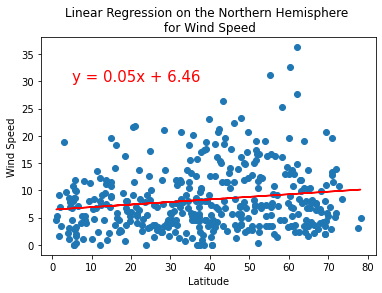

In [106]:
# Linear regression on the Wind Speed for the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (5,30))

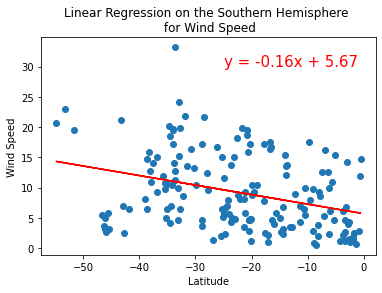

In [109]:
# Linear regression on the Wind Speed for the Northern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the plt_linear_regression(x_values, y_values, title, y_label, text_coordinates) function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-25,30))

Finding: The correlation between the latitude and wind speed is very low because the r-value is 0.05 for the Northern Hemisphere and less than –0.1 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.